In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
# initial research insprations

# https://github.com/gecko984/supervenn
# https://www.conceptdraw.com/How-To-Guide/venn-diagram-maker
# http://bioinformatics.psb.ugent.be/webtools/Venn/
# https://stackoverflow.com/questions/32440128/nice-looking-five-sets-venn-diagrams-in-r
# https://angiogenesis.dkfz.de/oncoexpress/software/sumo/venn.htm
# https://moebio.com/research/sevensets/

# found Edwards-Venn Diagrams, which seem perfect to start with!
# https://happyruin.wordpress.com/2013/03/24/edwards-venn-diagrams/


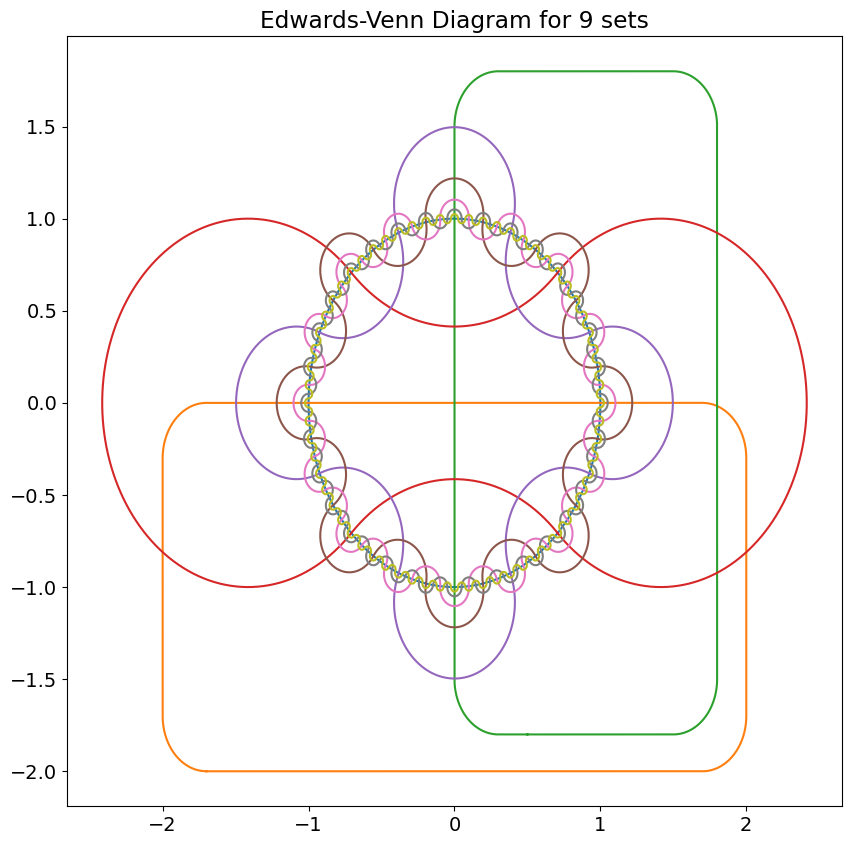

In [76]:
# font size
mpl.rcParams.update({'font.size': 14})

def make_edwards_venn(n, num_points=1000):

    curves = []
    if n >= 1: # circle
        curve = []
        for i in range(num_points):
            theta = 2*np.pi*i/num_points
            x = np.cos(theta)
            y = np.sin(theta)
            curve.append([x, y])
        curves.append(np.array(curve))
    
    if n >= 2: # bottom hemisphere
        rounded_corners_radius = 0.3

        horizontal_segment_dist = 4 - 2 * rounded_corners_radius
        vertical_segment_dist = 2 - 2 * rounded_corners_radius
        straight_dist = 2 * horizontal_segment_dist + 2 * vertical_segment_dist
        curved_dist = 2 * np.pi * rounded_corners_radius
        curved_corner_dist = curved_dist / 4
        total_dist = straight_dist + curved_dist
        spacing = num_points / total_dist
        num_points_per_curve = int(curved_corner_dist * spacing)
        angular_spacing = (np.pi / 2) / num_points_per_curve
        curve = []
        for i in range(int(horizontal_segment_dist * spacing)):
            curve.append([-2 + rounded_corners_radius + i / spacing, -2])
        for i in range(num_points_per_curve):
            theta = -np.pi / 2 + i * angular_spacing
            curve.append([2 - rounded_corners_radius + rounded_corners_radius * np.cos(theta), -2 + rounded_corners_radius + rounded_corners_radius * np.sin(theta)])
        for i in range(int(vertical_segment_dist * spacing)):
            curve.append([2, -2 + rounded_corners_radius + i / spacing])
        for i in range(num_points_per_curve):
            theta = i * angular_spacing
            curve.append([2 - rounded_corners_radius + rounded_corners_radius * np.cos(theta), -rounded_corners_radius + rounded_corners_radius * np.sin(theta)])
        for i in range(int(horizontal_segment_dist * spacing)):
            curve.append([2 - rounded_corners_radius - i / spacing, 0])
        for i in range(num_points_per_curve):
            theta = np.pi / 2 + i * angular_spacing
            curve.append([-2 + rounded_corners_radius + rounded_corners_radius * np.cos(theta), -rounded_corners_radius + rounded_corners_radius * np.sin(theta)])
        for i in range(int(vertical_segment_dist * spacing)):
            curve.append([-2, -rounded_corners_radius - i / spacing])
        for i in range(num_points_per_curve):
            theta = np.pi + i * angular_spacing
            curve.append([-2 + rounded_corners_radius + rounded_corners_radius * np.cos(theta), -2 + rounded_corners_radius + rounded_corners_radius * np.sin(theta)])

        curves.append(np.array(curve))

    if n >= 3: # right hemispheres
        offset = 0.2
        rounded_corners_radius = 0.3

        horizontal_segment_dist = 2 - 2 * rounded_corners_radius - 2 * offset
        vertical_segment_dist = 4 - 2 * rounded_corners_radius - 2 * offset
        straight_dist = 2 * horizontal_segment_dist + 2 * vertical_segment_dist
        curved_dist = 2 * np.pi * rounded_corners_radius
        curved_corner_dist = curved_dist / 4
        total_dist = straight_dist + curved_dist
        spacing = num_points / total_dist
        num_points_per_curve = int(curved_corner_dist * spacing)
        angular_spacing = (np.pi / 2) / num_points_per_curve
        curve = []
        for i in range(int(horizontal_segment_dist * spacing)):
            curve.append([offset + rounded_corners_radius + i / spacing, -2 + offset])
        for i in range(num_points_per_curve):
            theta = -np.pi / 2 + i * angular_spacing
            curve.append([2 - offset - rounded_corners_radius + rounded_corners_radius * np.cos(theta), -2 + offset + rounded_corners_radius + rounded_corners_radius * np.sin(theta)])
        for i in range(int(vertical_segment_dist * spacing)):
            curve.append([2 - offset, -2 + offset + rounded_corners_radius + i / spacing])
        for i in range(num_points_per_curve):
            theta = i * angular_spacing
            curve.append([2 - offset - rounded_corners_radius + rounded_corners_radius * np.cos(theta), 2 - offset - rounded_corners_radius + rounded_corners_radius * np.sin(theta)])
        for i in range(int(horizontal_segment_dist * spacing)):
            curve.append([2 - offset - rounded_corners_radius - i / spacing, 2 - offset])
        for i in range(num_points_per_curve):
            theta = np.pi / 2 + i * angular_spacing
            curve.append([rounded_corners_radius + rounded_corners_radius * np.cos(theta), 2 - offset - rounded_corners_radius + rounded_corners_radius * np.sin(theta)])
        for i in range(int(vertical_segment_dist * spacing)):
            curve.append([0, 2 - offset - rounded_corners_radius - i / spacing])
        for i in range(num_points_per_curve):
            theta = np.pi + i * angular_spacing
            curve.append([rounded_corners_radius + rounded_corners_radius * np.cos(theta), -2 + offset + rounded_corners_radius + rounded_corners_radius * np.sin(theta)])

        curves.append(np.array(curve))

        

    if n >= 4: # tennis-ball-like sections

        for curr_n in range(4, n+1):

            iteration = curr_n - 4
            num_circles = 4 * 2**iteration

            curve = []
            num_points_per_circle = num_points // num_circles
            for j in range(num_circles):

                theta_j_center = 2*np.pi*j/num_circles
                theta_j_start = theta_j_center - np.pi/num_circles

                circle_center_radius = 1 / np.cos(np.pi/num_circles)
                circle_radius = np.tan(np.pi / num_circles)

                convex = (j % 2 == 0)

                center_x = circle_center_radius * np.cos(theta_j_center)
                center_y = circle_center_radius * np.sin(theta_j_center)

                if convex:
                    circle_arc_measure = np.pi + 2 * np.pi/num_circles
                    for i in range(num_points_per_circle):
                        theta = theta_j_start - np.pi/2 + circle_arc_measure * i / num_points_per_circle
                        x = center_x + circle_radius * np.cos(theta)
                        y = center_y + circle_radius * np.sin(theta)
                        curve.append([x, y])
                else:
                    circle_arc_measure = np.pi - 2 * np.pi/num_circles
                    for i in range(num_points_per_circle):
                        theta = theta_j_start - np.pi / 2 - circle_arc_measure * i / num_points_per_circle
                        x = center_x + circle_radius * np.cos(theta)
                        y = center_y + circle_radius * np.sin(theta)
                        curve.append([x, y])
            curves.append(np.array(curve))

    return curves


def plot_edwards_venn(n, num_points=1000):
    curves = make_edwards_venn(n, num_points)
    plt.figure(figsize=(10, 10))
    for curve in curves:
        completed_loop_curve = np.concatenate([curve, curve[0:1]])
        plt.plot(completed_loop_curve[:,0], completed_loop_curve[:,1])

    plt.title(f"Edwards-Venn Diagram for {n} sets")
    plt.show()

plot_edwards_venn(9, num_points=1000)

